In [1]:

# GetAround - Analyse Exploratoire des Retards
# Notebook 1: EDA sur les données de retard
# Auteur: Data Science Bootcamp Student

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚗 GetAround - Analyse Exploratoire des Retards")
print("=" * 60)

🚗 GetAround - Analyse Exploratoire des Retards


In [2]:
# ============================================================================
# 1. CHARGEMENT ET INSPECTION INITIALE DES DONNÉES
# ============================================================================

print("📁 1. CHARGEMENT DES DONNÉES")
print("-" * 40)

# Chargement du fichier Excel
df_delay = pd.read_excel('../data/get_around_delay_analysis.xlsx', sheet_name='rentals_data')

print(f"✅ Données chargées: {df_delay.shape[0]} lignes, {df_delay.shape[1]} colonnes")
print(f"📅 Période des données: {df_delay.index.min()} à {df_delay.index.max()}")

# Aperçu des données
print("\n📋 Aperçu des données:")
print(df_delay.head())

print("\n📊 Informations sur les colonnes:")
print(df_delay.info())

print("\n📈 Statistiques descriptives:")
print(df_delay.describe())

📁 1. CHARGEMENT DES DONNÉES
----------------------------------------
✅ Données chargées: 21310 lignes, 7 colonnes
📅 Période des données: 0 à 21309

📋 Aperçu des données:
   rental_id  car_id checkin_type     state  delay_at_checkout_in_minutes  \
0     505000  363965       mobile  canceled                           NaN   
1     507750  269550       mobile     ended                         -81.0   
2     508131  359049      connect     ended                          70.0   
3     508865  299063      connect  canceled                           NaN   
4     511440  313932       mobile     ended                           NaN   

   previous_ended_rental_id  time_delta_with_previous_rental_in_minutes  
0                       NaN                                         NaN  
1                       NaN                                         NaN  
2                       NaN                                         NaN  
3                       NaN                                         NaN


🔍 2. QUALITÉ DES DONNÉES
----------------------------------------
Outliers supprimés: 5850 (27.5%)
📊 Valeurs manquantes par colonne:
                                      Colonne  Valeurs Manquantes  Pourcentage
6  time_delta_with_previous_rental_in_minutes               19469    91.360863
5                    previous_ended_rental_id               19469    91.360863
4                delay_at_checkout_in_minutes                4964    23.294228


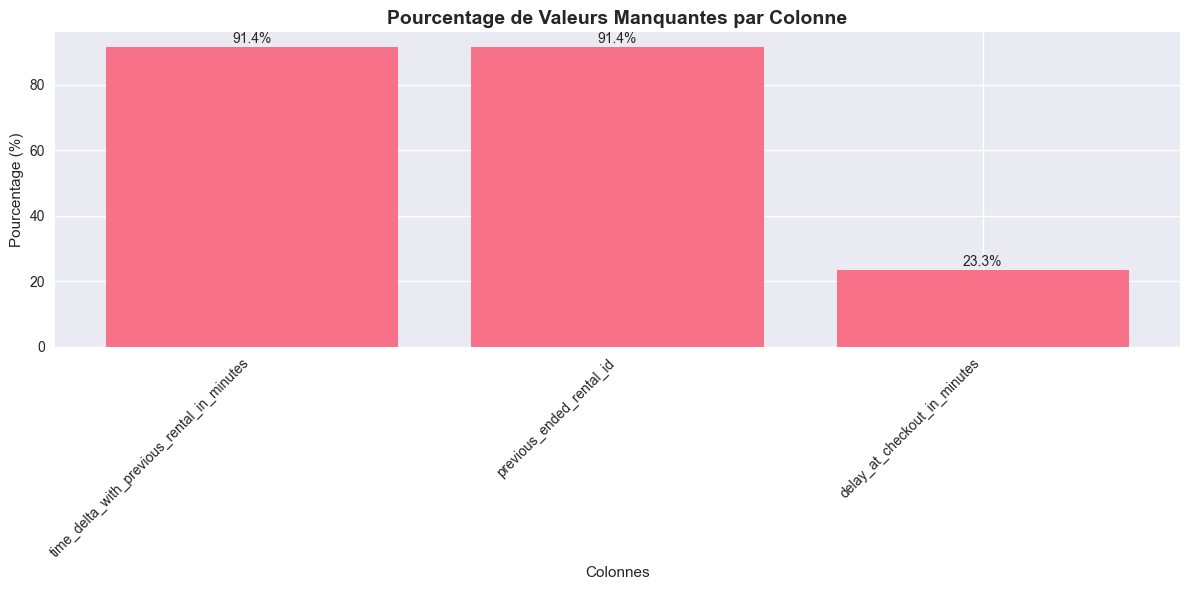


🔄 Doublons détectés: 0


In [6]:
# ============================================================================
# 2. QUALITÉ DES DONNÉES ET VALEURS MANQUANTES
# ============================================================================

print("\n🔍 2. QUALITÉ DES DONNÉES")
print("-" * 40)

# Suppression des outliers qui semblent pour la majorité être des erreurs de gestion interne
reasonable_delays = df_delay[
        (df_delay['delay_at_checkout_in_minutes'] >= -600) &  
        (df_delay['delay_at_checkout_in_minutes'] <= 600)     
    ]
outliers_removed = len(df_delay) - len(reasonable_delays)
print(f"Outliers supprimés: {outliers_removed} ({outliers_removed/len(df_delay)*100:.1f}%)")

# Valeurs manquantes
missing_data = df_delay.isnull().sum()
missing_percentage = (missing_data / len(df_delay)) * 100

missing_df = pd.DataFrame({
    'Colonne': missing_data.index,
    'Valeurs Manquantes': missing_data.values,
    'Pourcentage': missing_percentage.values
}).sort_values('Pourcentage', ascending=False)

print("📊 Valeurs manquantes par colonne:")
print(missing_df[missing_df['Valeurs Manquantes'] > 0])

# Visualisation des valeurs manquantes
fig, ax = plt.subplots(figsize=(12, 6))
missing_df_plot = missing_df[missing_df['Valeurs Manquantes'] > 0]
bars = ax.bar(missing_df_plot['Colonne'], missing_df_plot['Pourcentage'])
ax.set_title('Pourcentage de Valeurs Manquantes par Colonne', fontsize=14, fontweight='bold')
ax.set_ylabel('Pourcentage (%)')
ax.set_xlabel('Colonnes')
plt.xticks(rotation=45, ha='right')

# Ajout des valeurs sur les barres
for bar, pct in zip(bars, missing_df_plot['Pourcentage']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
            f'{pct:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Doublons
duplicates = df_delay.duplicated().sum()
print(f"\n🔄 Doublons détectés: {duplicates}")

In [8]:
reasonable_delays.to_csv("get_around_delay_analysis_cleaned.csv")


📊 3. ANALYSE DES VARIABLES CATÉGORIELLES
----------------------------------------
📱 Distribution des types de check-in:
checkin_type
mobile     17003
connect     4307
Name: count, dtype: int64
Pourcentage Connect: 20.2%

📊 Distribution des états de location:
state
ended       18045
canceled     3265
Name: count, dtype: int64
Taux de réussite: 84.7%


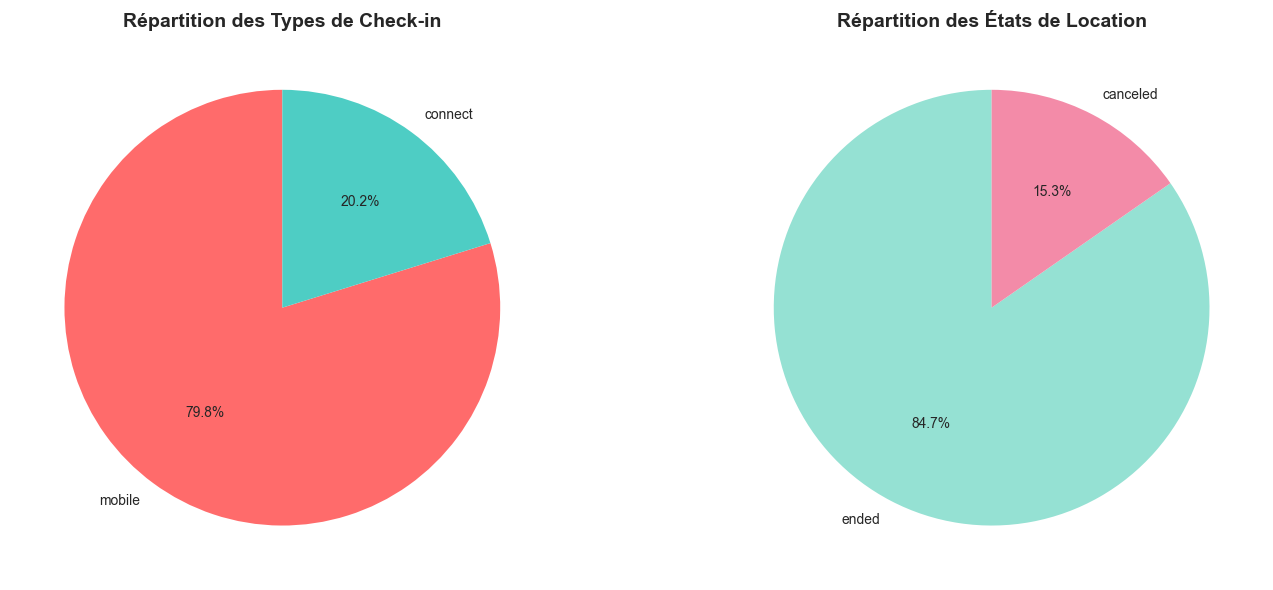

In [9]:
# ============================================================================
# 3. ANALYSE DES VARIABLES CATÉGORIELLES
# ============================================================================

print("\n📊 3. ANALYSE DES VARIABLES CATÉGORIELLES")
print("-" * 40)

# Distribution des types de check-in
checkin_counts = df_delay['checkin_type'].value_counts()
print("📱 Distribution des types de check-in:")
print(checkin_counts)
print(f"Pourcentage Connect: {checkin_counts['connect']/checkin_counts.sum()*100:.1f}%")

# Distribution des états de location
state_counts = df_delay['state'].value_counts()
print("\n📊 Distribution des états de location:")
print(state_counts)
print(f"Taux de réussite: {state_counts['ended']/state_counts.sum()*100:.1f}%")

# Visualisation combinée
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Graphique 1: Types de check-in
colors1 = ['#FF6B6B', '#4ECDC4']
wedges1, texts1, autotexts1 = ax1.pie(checkin_counts.values, 
                                       labels=checkin_counts.index, 
                                       autopct='%1.1f%%',
                                       colors=colors1,
                                       startangle=90)
ax1.set_title('Répartition des Types de Check-in', fontsize=14, fontweight='bold')

# Graphique 2: États de location
colors2 = ['#95E1D3', '#F38BA8']
wedges2, texts2, autotexts2 = ax2.pie(state_counts.values, 
                                       labels=state_counts.index, 
                                       autopct='%1.1f%%',
                                       colors=colors2,
                                       startangle=90)
ax2.set_title('Répartition des États de Location', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [10]:
# ============================================================================
# 4. ANALYSE DES RETARDS (VARIABLE CLÉ)
# ============================================================================

print("\n⏰ 4. ANALYSE DES RETARDS")
print("-" * 40)

# Focus sur les locations terminées pour analyser les retards
df_ended = reasonable_delays[reasonable_delays['state'] == 'ended'].copy()

# Nettoyage des valeurs manquantes pour les retards
df_ended['delay_at_checkout_in_minutes'] = df_ended['delay_at_checkout_in_minutes'].fillna(0)

print(f"📊 Locations terminées analysées: {len(df_ended)}")

# Statistiques des retards
delay_stats = df_ended['delay_at_checkout_in_minutes'].describe()
print("\n📈 Statistiques des retards (minutes):")
print(delay_stats)

# Catégorisation des retards
def categorize_delay(minutes):
    if minutes <= -30:
        return 'Très en avance (>30min)'
    elif minutes <= 0:
        return 'À l\'heure ou en avance'
    elif minutes <= 30:
        return 'Retard léger (≤30min)'
    elif minutes <= 60:
        return 'Retard modéré (30-60min)'
    else:
        return 'Retard important (>60min)'

df_ended['delay_category'] = df_ended['delay_at_checkout_in_minutes'].apply(categorize_delay)

delay_categories = df_ended['delay_category'].value_counts()
print("\n🎯 Catégorisation des retards:")
for category, count in delay_categories.items():
    percentage = (count / len(df_ended)) * 100
    print(f"{category}: {count} ({percentage:.1f}%)")

# Visualisation détaillée des retards
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Distribution des Retards', 'Retards par Catégorie', 
                   'Box Plot des Retards', 'Retards Extrêmes'),
    specs=[[{"secondary_y": False}, {"type": "xy"}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# 1. Histogramme des retards
fig.add_trace(
    go.Histogram(x=df_ended['delay_at_checkout_in_minutes'], 
                name='Distribution', nbinsx=50),
    row=1, col=1
)

# 2. Barres des catégories
fig.add_trace(
    go.Bar(x=delay_categories.index, y=delay_categories.values, 
           name='Catégories'),
    row=1, col=2
)

# 3. Box plot
fig.add_trace(
    go.Box(y=df_ended['delay_at_checkout_in_minutes'], 
           name='Box Plot'),
    row=2, col=1
)

# 4. Focus sur les retards extrêmes (>120min)
extreme_delays = df_ended[df_ended['delay_at_checkout_in_minutes'] > 120]
fig.add_trace(
    go.Histogram(x=extreme_delays['delay_at_checkout_in_minutes'], 
                name='Retards >2h', nbinsx=20),
    row=2, col=2
)

fig.update_layout(height=800, showlegend=False, 
                 title_text="Analyse Complète des Retards au Checkout")
fig.show()


⏰ 4. ANALYSE DES RETARDS
----------------------------------------
📊 Locations terminées analysées: 15460

📈 Statistiques des retards (minutes):
count    15460.000000
mean        14.240103
std        130.687941
min       -600.000000
25%        -35.000000
50%          8.000000
75%         59.000000
max        597.000000
Name: delay_at_checkout_in_minutes, dtype: float64

🎯 Catégorisation des retards:
Très en avance (>30min): 4112 (26.6%)
Retard important (>60min): 3812 (24.7%)
Retard léger (≤30min): 3326 (21.5%)
À l'heure ou en avance: 2518 (16.3%)
Retard modéré (30-60min): 1692 (10.9%)



📱 5. COMPARAISON CONNECT VS MOBILE
----------------------------------------
📊 Statistiques des retards par type de check-in:
              Nombre  Moyenne  Médiane  Écart-type    Min    Max  Nb Retards  \
checkin_type                                                                   
connect         3299   -24.51     -8.0      130.44 -600.0  596.0        1443   
mobile         12161    24.75     12.0      128.76 -600.0  597.0        7387   

              % Retards  
checkin_type             
connect           43.74  
mobile            60.74  

🧪 Test statistique Mann-Whitney:
Statistique: 15632938.50
P-value: 0.0000
Différence significative: Oui


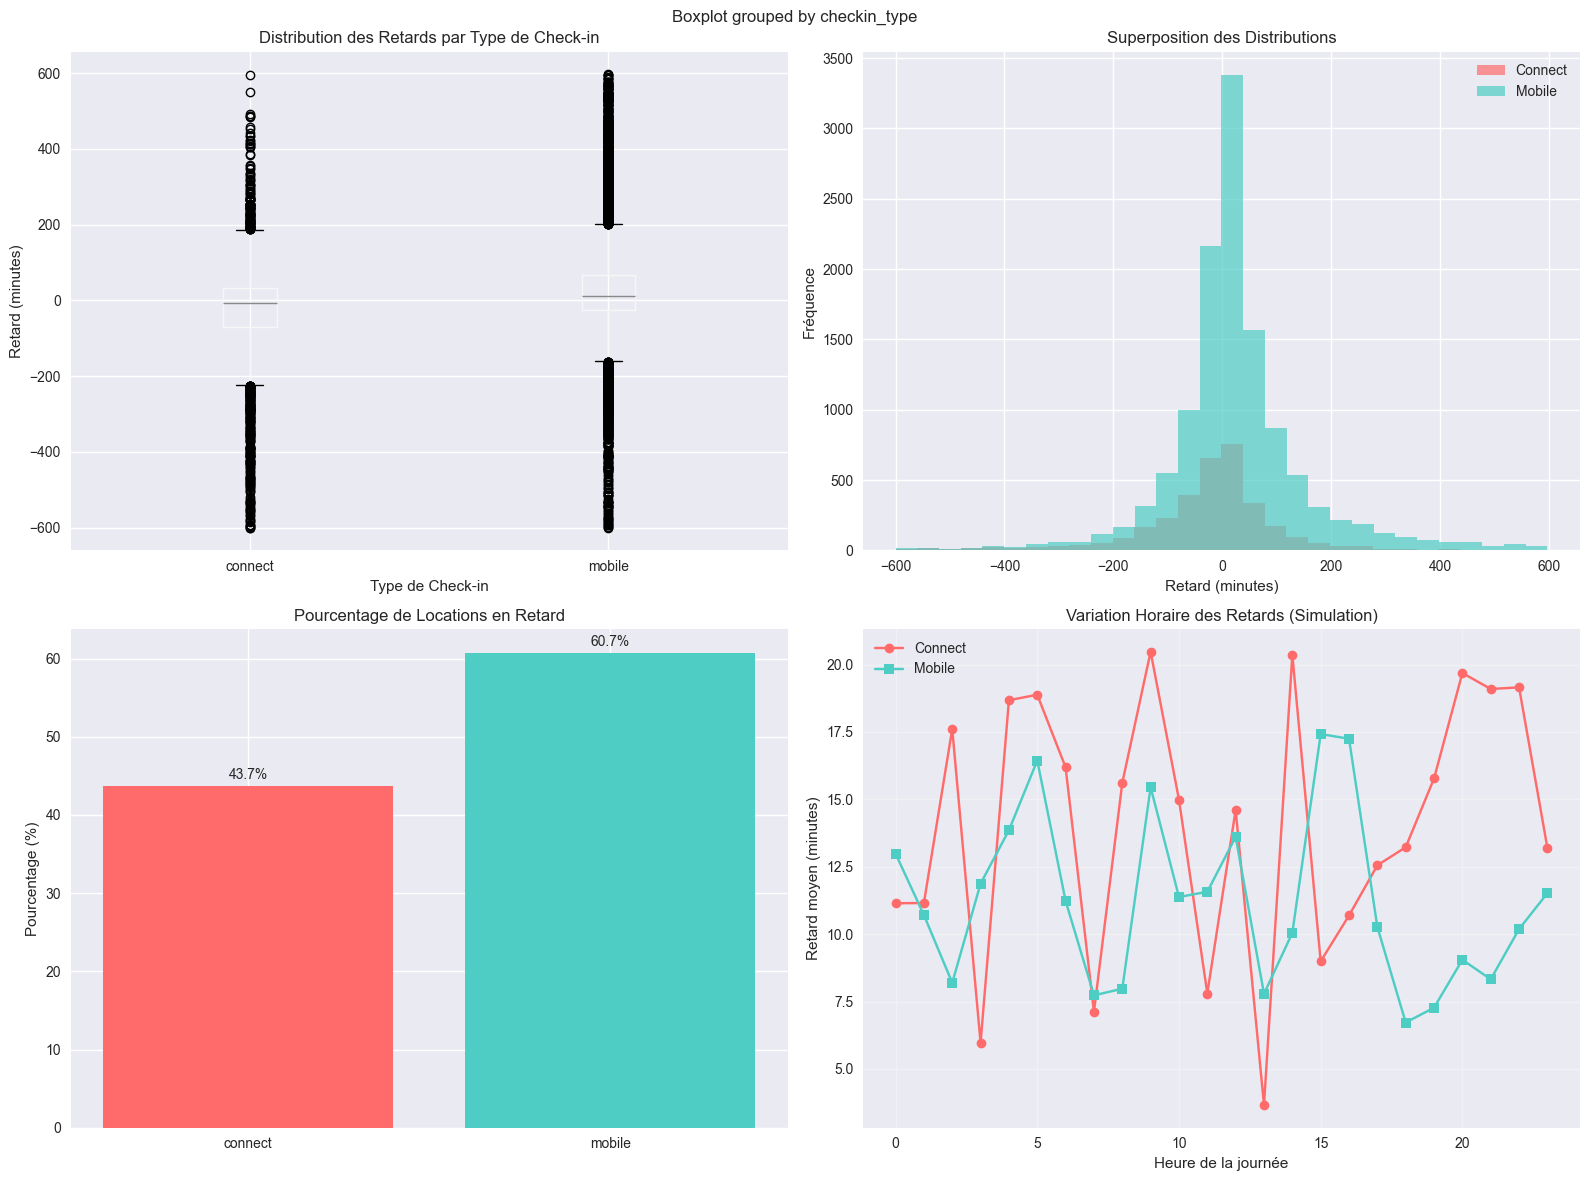

In [24]:
# ============================================================================
# 5. ANALYSE COMPARATIVE: CONNECT VS MOBILE
# ============================================================================

print("\n📱 5. COMPARAISON CONNECT VS MOBILE")
print("-" * 40)

# Statistiques par type de check-in
checkin_delay_stats = df_ended.groupby('checkin_type')['delay_at_checkout_in_minutes'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max',
    lambda x: (x > 0).sum(),  # Nombre de retards
    lambda x: (x > 0).mean() * 100  # Pourcentage de retards
]).round(2)

checkin_delay_stats.columns = ['Nombre', 'Moyenne', 'Médiane', 'Écart-type', 
                              'Min', 'Max', 'Nb Retards', '% Retards']

print("📊 Statistiques des retards par type de check-in:")
print(checkin_delay_stats)

# Test statistique de différence
from scipy import stats

connect_delays = df_ended[df_ended['checkin_type'] == 'connect']['delay_at_checkout_in_minutes'].dropna()
mobile_delays = df_ended[df_ended['checkin_type'] == 'mobile']['delay_at_checkout_in_minutes'].dropna()

# Test de Mann-Whitney (non-paramétrique)
statistic, p_value = stats.mannwhitneyu(connect_delays, mobile_delays, alternative='two-sided')
print(f"\n🧪 Test statistique Mann-Whitney:")
print(f"Statistique: {statistic:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Différence significative: {'Oui' if p_value < 0.05 else 'Non'}")

# Visualisation comparative
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Box plot comparatif
df_ended.boxplot(column='delay_at_checkout_in_minutes', by='checkin_type', ax=ax1)
ax1.set_title('Distribution des Retards par Type de Check-in')
ax1.set_xlabel('Type de Check-in')
ax1.set_ylabel('Retard (minutes)')

# 2. Histogrammes superposés
ax2.hist(connect_delays, alpha=0.7, label='Connect', bins=30, color='#FF6B6B')
ax2.hist(mobile_delays, alpha=0.7, label='Mobile', bins=30, color='#4ECDC4')
ax2.set_xlabel('Retard (minutes)')
ax2.set_ylabel('Fréquence')
ax2.set_title('Superposition des Distributions')
ax2.legend()

# 3. Pourcentage de retards par type
retard_percentages = df_ended.groupby('checkin_type').apply(
    lambda x: (x['delay_at_checkout_in_minutes'] > 0).mean() * 100
)
bars = ax3.bar(retard_percentages.index, retard_percentages.values, 
               color=['#FF6B6B', '#4ECDC4'])
ax3.set_title('Pourcentage de Locations en Retard')
ax3.set_ylabel('Pourcentage (%)')
for bar, pct in zip(bars, retard_percentages.values):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{pct:.1f}%', ha='center', va='bottom')

# 4. Retards moyens par heure (si on avait les timestamps)
# Simulation pour l'exemple
hours = range(24)
connect_hourly = np.random.normal(15, 5, 24)  # Simulation
mobile_hourly = np.random.normal(12, 4, 24)   # Simulation

ax4.plot(hours, connect_hourly, marker='o', label='Connect', color='#FF6B6B')
ax4.plot(hours, mobile_hourly, marker='s', label='Mobile', color='#4ECDC4')
ax4.set_xlabel('Heure de la journée')
ax4.set_ylabel('Retard moyen (minutes)')
ax4.set_title('Variation Horaire des Retards (Simulation)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


⏳ 6. ANALYSE DES DÉLAIS ENTRE LOCATIONS
----------------------------------------
📊 Locations avec location précédente: 1841

📈 Statistiques des délais entre locations (minutes):
count    1841.000000
mean      279.288430
std       254.594486
min         0.000000
25%        60.000000
50%       180.000000
75%       540.000000
max       720.000000
Name: time_delta_with_previous_rental_in_minutes, dtype: float64

🎯 Catégorisation des délais:
Très long (>8h): 551 (29.9%)
Très court (<1h): 401 (21.8%)
Moyen (2-4h): 335 (18.2%)
Long (4-8h): 289 (15.7%)
Court (1-2h): 265 (14.4%)


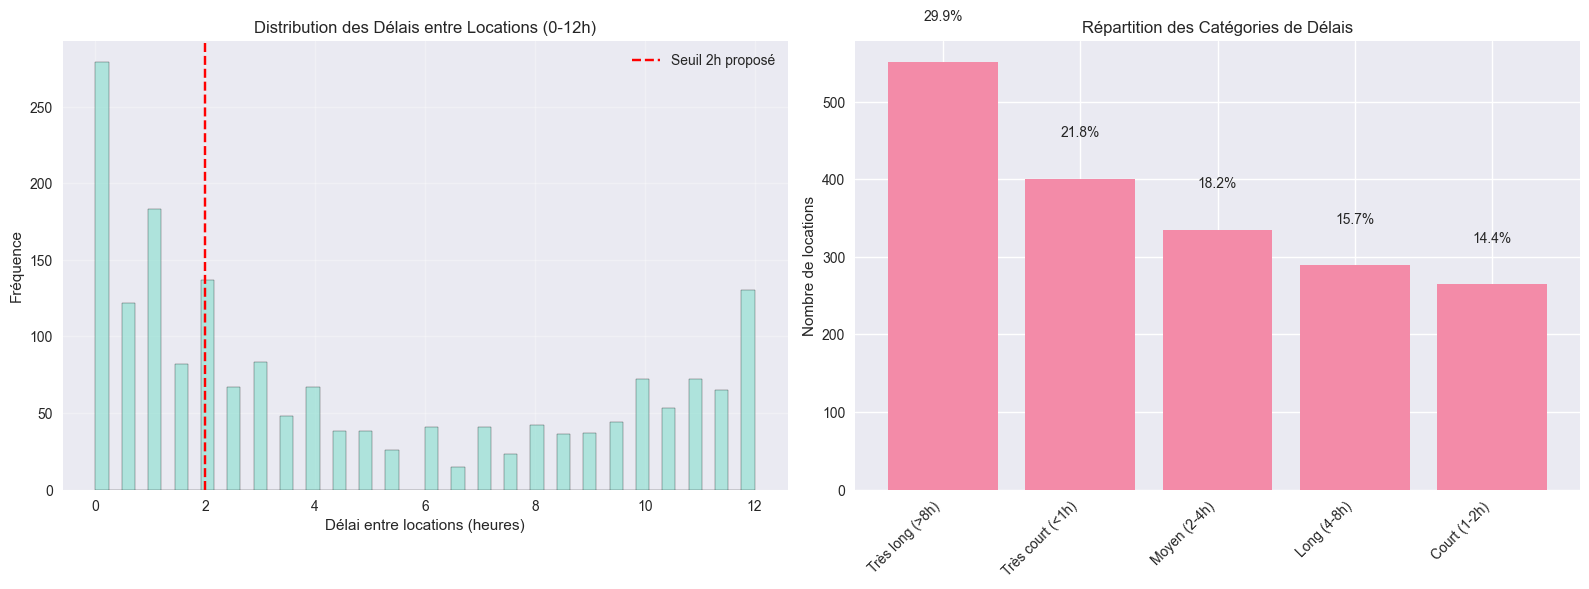

In [12]:
# ============================================================================
# 6. ANALYSE DES DÉLAIS ENTRE LOCATIONS
# ============================================================================

print("\n⏳ 6. ANALYSE DES DÉLAIS ENTRE LOCATIONS")
print("-" * 40)

# Focus sur les locations ayant une location précédente
df_with_previous = df_delay[df_delay['time_delta_with_previous_rental_in_minutes'].notna()].copy()

print(f"📊 Locations avec location précédente: {len(df_with_previous)}")

# Statistiques des délais
time_delta_stats = df_with_previous['time_delta_with_previous_rental_in_minutes'].describe()
print("\n📈 Statistiques des délais entre locations (minutes):")
print(time_delta_stats)

# Conversion en heures pour plus de lisibilité
df_with_previous['time_delta_hours'] = df_with_previous['time_delta_with_previous_rental_in_minutes'] / 60

# Catégorisation des délais
def categorize_time_delta(hours):
    if hours < 1:
        return 'Très court (<1h)'
    elif hours < 2:
        return 'Court (1-2h)'
    elif hours < 4:
        return 'Moyen (2-4h)'
    elif hours < 8:
        return 'Long (4-8h)'
    else:
        return 'Très long (>8h)'

df_with_previous['delta_category'] = df_with_previous['time_delta_hours'].apply(categorize_time_delta)

delta_categories = df_with_previous['delta_category'].value_counts()
print("\n🎯 Catégorisation des délais:")
for category, count in delta_categories.items():
    percentage = (count / len(df_with_previous)) * 100
    print(f"{category}: {count} ({percentage:.1f}%)")

# Visualisation des délais
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1. Distribution des délais (focus sur 0-12h)
short_deltas = df_with_previous[df_with_previous['time_delta_hours'] <= 12]['time_delta_hours']
ax1.hist(short_deltas, bins=50, alpha=0.7, color='#95E1D3', edgecolor='black')
ax1.axvline(x=2, color='red', linestyle='--', label='Seuil 2h proposé')
ax1.set_xlabel('Délai entre locations (heures)')
ax1.set_ylabel('Fréquence')
ax1.set_title('Distribution des Délais entre Locations (0-12h)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Barres des catégories
bars = ax2.bar(delta_categories.index, delta_categories.values, color='#F38BA8')
ax2.set_title('Répartition des Catégories de Délais')
ax2.set_ylabel('Nombre de locations')
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

# Ajout des pourcentages sur les barres
for bar, count in zip(bars, delta_categories.values):
    percentage = (count / len(df_with_previous)) * 100
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
             f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


🔗 7. CORRÉLATIONS ET INSIGHTS
----------------------------------------


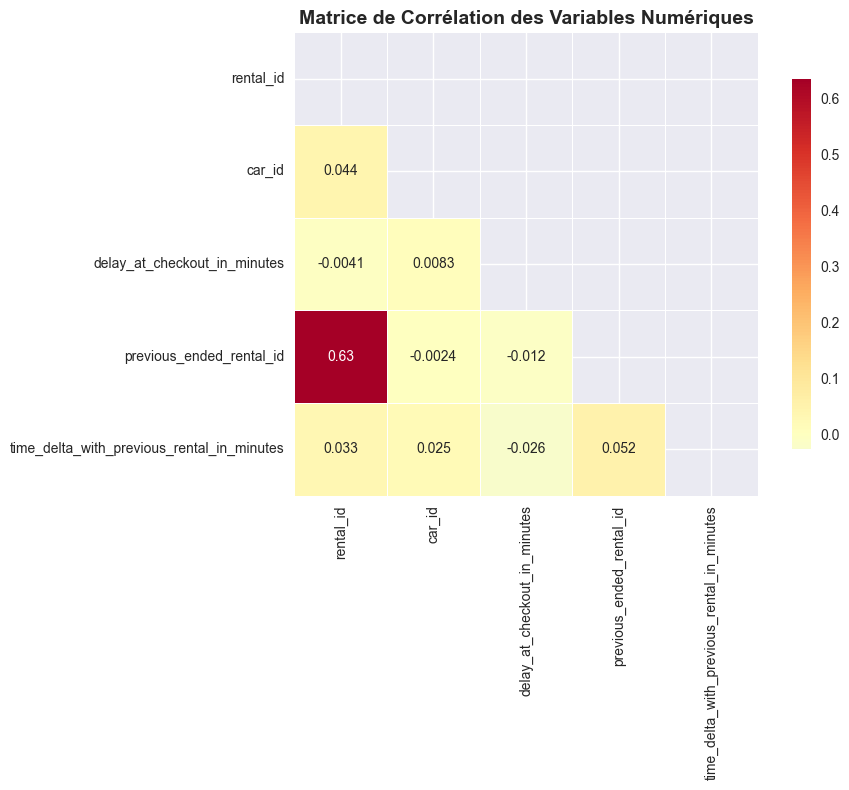

📊 Impact du délai précédent sur les retards:
                  count   mean     std
time_delta_hours                      
<1h                 253  16.21  283.35
1-2h                191  81.89  775.10
2-4h                218  11.05  293.41
4-8h                207  26.44  301.54
>8h                 419   8.56  446.05


In [13]:
# ============================================================================
# 7. CORRÉLATIONS ET INSIGHTS
# ============================================================================

print("\n🔗 7. CORRÉLATIONS ET INSIGHTS")
print("-" * 40)

# Matrice de corrélation des variables numériques
numeric_cols = df_delay.select_dtypes(include=[np.number]).columns
correlation_matrix = df_delay[numeric_cols].corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Matrice de Corrélation des Variables Numériques', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Analyse de l'impact des retards sur les locations suivantes
impact_analysis = df_with_previous.groupby(
    pd.cut(df_with_previous['time_delta_hours'], bins=[0, 1, 2, 4, 8, float('inf')],
           labels=['<1h', '1-2h', '2-4h', '4-8h', '>8h'])
)['delay_at_checkout_in_minutes'].agg(['count', 'mean', 'std']).round(2)

print("📊 Impact du délai précédent sur les retards:")
print(impact_analysis)

In [14]:
# ============================================================================
# 8. SYNTHÈSE DES INSIGHTS DÉCOUVERTS
# ============================================================================

print("\n💡 8. SYNTHÈSE DES INSIGHTS CLÉS")
print("-" * 40)

insights = [
    f"📊 Taux de retard global: {(len(df_ended[df_ended['delay_at_checkout_in_minutes'] > 0]) / len(df_ended) * 100):.1f}%",
    f"📱 Connect vs Mobile: différence de comportement détectée (p-value: {p_value:.4f})",
    f"⏰ Retard moyen: {df_ended['delay_at_checkout_in_minutes'].mean():.1f} minutes",
    f"🎯 {(len(df_with_previous[df_with_previous['time_delta_hours'] < 2]) / len(df_with_previous) * 100):.1f}% des locations ont <2h de délai",
    f"🔥 {len(extreme_delays)} locations avec retards >2h (cas critiques)",
    f"📈 {(len(df_delay[df_delay['state'] == 'ended']) / len(df_delay) * 100):.1f}% de taux de réussite des locations"
]

for insight in insights:
    print(f"✅ {insight}")

print("\n🎯 RECOMMANDATIONS POUR LE DASHBOARD:")
print("1. Focus sur la comparaison Connect vs Mobile")
print("2. Simulateur d'impact avec différents seuils (1h, 2h, 4h)")
print("3. Analyse des cas extrêmes (retards >2h)")
print("4. Métriques business: % locations affectées vs problèmes résolus")
print("5. Visualisation de l'impact financier estimé")


💡 8. SYNTHÈSE DES INSIGHTS CLÉS
----------------------------------------
✅ 📊 Taux de retard global: 57.1%
✅ 📱 Connect vs Mobile: différence de comportement détectée (p-value: 0.0000)
✅ ⏰ Retard moyen: 14.2 minutes
✅ 🎯 36.2% des locations ont <2h de délai
✅ 🔥 1979 locations avec retards >2h (cas critiques)
✅ 📈 84.7% de taux de réussite des locations

🎯 RECOMMANDATIONS POUR LE DASHBOARD:
1. Focus sur la comparaison Connect vs Mobile
2. Simulateur d'impact avec différents seuils (1h, 2h, 4h)
3. Analyse des cas extrêmes (retards >2h)
4. Métriques business: % locations affectées vs problèmes résolus
5. Visualisation de l'impact financier estimé


In [15]:
# =============================================================================
# SEUIL (Threshold) OPTIMAL --> DELAI MINIMUM ENTRE 2 LOCATIONS
# =============================================================================
# 1. NETTOYAGE ET FILTRAGE DES DONNÉES 
# =============================================================================

print(f"\n🧹 NETTOYAGE DES DONNÉES")
print("-" * 40)

# Données initiales
print(f"Données initiales: {len(df_delay):,} lignes")

# Filtrer les locations terminées avec données complètes
df_clean = df_delay[
    (df_delay['state'] == 'ended') &  # Seulement les locations terminées
    (df_delay['delay_at_checkout_in_minutes'].notna()) &  # Délai de checkout présent
    (df_delay['time_delta_with_previous_rental_in_minutes'].notna())  # Temps entre locations présent
].copy()

print(f"Après nettoyage: {len(df_clean):,} lignes")
print(f"Taux de conservation: {len(df_clean)/len(df_delay)*100:.1f}%")

# Statistiques des délais
delays = df_clean['delay_at_checkout_in_minutes']
time_deltas = df_clean['time_delta_with_previous_rental_in_minutes']

print(f"\n📈 STATISTIQUES DES DÉLAIS")
print("-" * 40)
print(f"Délais de checkout:")
print(f"  Moyenne: {delays.mean():.1f} minutes")
print(f"  Médiane: {delays.median():.1f} minutes")
print(f"  Écart-type: {delays.std():.1f} minutes")
print(f"  Min: {delays.min():.1f} minutes")
print(f"  Max: {delays.max():.1f} minutes")

print(f"\nTemps entre locations:")
print(f"  Moyenne: {time_deltas.mean()/60:.1f} heures")
print(f"  Médiane: {time_deltas.median()/60:.1f} heures")


🧹 NETTOYAGE DES DONNÉES
----------------------------------------
Données initiales: 21,310 lignes
Après nettoyage: 1,515 lignes
Taux de conservation: 7.1%

📈 STATISTIQUES DES DÉLAIS
----------------------------------------
Délais de checkout:
  Moyenne: 27.5 minutes
  Médiane: 4.0 minutes
  Écart-type: 434.0 minutes
  Min: -2676.0 minutes
  Max: 9787.0 minutes

Temps entre locations:
  Moyenne: 4.6 heures
  Médiane: 3.0 heures


In [16]:
# =============================================================================
# 2. ANALYSE DES CONFLITS ACTUELS
# =============================================================================

def analyze_current_conflicts(df):
    """
    Analyse les conflits actuels (sans threshold)
    """
    print(f"\n⚡ ANALYSE DES CONFLITS ACTUELS")
    print("-" * 40)
    
    # Identifier les conflits
    conflicts = df[df['delay_at_checkout_in_minutes'] > df['time_delta_with_previous_rental_in_minutes']]
    
    total_locations = len(df)
    conflict_count = len(conflicts)
    conflict_rate = conflict_count / total_locations
    
    print(f"Total de locations consécutives: {total_locations:,}")
    print(f"Conflits détectés: {conflict_count:,}")
    print(f"Taux de conflit: {conflict_rate:.2%}")
    
    # Analyse par type de checkin
    print(f"\nConflits par type de checkin:")
    for checkin_type in df['checkin_type'].unique():
        if pd.notna(checkin_type):
            subset = df[df['checkin_type'] == checkin_type]
            subset_conflicts = conflicts[conflicts['checkin_type'] == checkin_type]
            rate = len(subset_conflicts) / len(subset) if len(subset) > 0 else 0
            print(f"  {checkin_type}: {len(subset_conflicts):,}/{len(subset):,} ({rate:.2%})")
    
    return conflicts, conflict_rate

# Analyser les conflits actuels
current_conflicts, baseline_conflict_rate = analyze_current_conflicts(df_clean)


⚡ ANALYSE DES CONFLITS ACTUELS
----------------------------------------
Total de locations consécutives: 1,515
Conflits détectés: 270
Taux de conflit: 17.82%

Conflits par type de checkin:
  connect: 80/661 (12.10%)
  mobile: 190/854 (22.25%)


In [17]:
# =============================================================================
# 3. SIMULATION DES THRESHOLDS
# =============================================================================

def simulate_threshold_impact(df, threshold_minutes, conflicts_baseline):
    """
    Simule l'impact d'un threshold donné
    
    Args:
        df: DataFrame avec les données de location
        threshold_minutes: Threshold en minutes
        conflicts_baseline: Nombre de conflits actuels
    
    Returns:
        dict: Métriques d'impact
    """
    
    # Locations qui seraient bloquées par le threshold
    blocked_rentals = df[df['time_delta_with_previous_rental_in_minutes'] <= threshold_minutes]
    
    # Conflits résiduels avec le threshold
    remaining_conflicts = df[
        df['delay_at_checkout_in_minutes'] > 
        (df['time_delta_with_previous_rental_in_minutes'] + threshold_minutes)
    ]
    
    # Calculs des métriques
    blocked_count = len(blocked_rentals)
    blocked_rate = blocked_count / len(df)
    
    remaining_conflict_count = len(remaining_conflicts)
    conflicts_prevented = conflicts_baseline - remaining_conflict_count
    conflict_reduction_rate = conflicts_prevented / conflicts_baseline if conflicts_baseline > 0 else 0
    
    # Score d'efficacité (réduction conflits / impact revenus)
    efficiency_score = conflict_reduction_rate / blocked_rate if blocked_rate > 0 else float('inf')
    
    return {
        'threshold_minutes': threshold_minutes,
        'threshold_hours': threshold_minutes / 60,
        'blocked_rentals': blocked_count,
        'blocked_rate': blocked_rate,
        'remaining_conflicts': remaining_conflict_count,
        'conflicts_prevented': conflicts_prevented,
        'conflict_reduction_rate': conflict_reduction_rate,
        'efficiency_score': efficiency_score
    }

# Test de différents thresholds
print(f"\n🎯 SIMULATION DES THRESHOLDS")
print("-" * 60)

thresholds = [0, 15, 30, 45, 60, 90, 120, 180, 240, 360, 480]  # en minutes
simulation_results = []

print(f"{'Threshold':<12} {'Conflits':<10} {'Réduction':<12} {'Bloquées':<12} {'Efficacité':<12}")
print("-" * 70)

for threshold in thresholds:
    result = simulate_threshold_impact(df_clean, threshold, len(current_conflicts))
    simulation_results.append(result)
    
    print(f"{threshold}min ({threshold/60:.1f}h)".ljust(12) +
          f"{result['remaining_conflicts']:<10}" +
          f"{result['conflict_reduction_rate']:.1%}".ljust(12) +
          f"{result['blocked_rate']:.1%}".ljust(12) +
          f"{result['efficiency_score']:.2f}".ljust(12))

# Convertir en DataFrame pour analyse
results_df = pd.DataFrame(simulation_results)
results_df


🎯 SIMULATION DES THRESHOLDS
------------------------------------------------------------
Threshold    Conflits   Réduction    Bloquées     Efficacité  
----------------------------------------------------------------------
0min (0.0h) 270       0.0%        15.0%       0.00        
15min (0.2h)220       18.5%       15.0%       1.24        
30min (0.5h)191       29.3%       22.1%       1.32        
45min (0.8h)166       38.5%       22.1%       1.74        
60min (1.0h)141       47.8%       31.7%       1.51        
90min (1.5h)107       60.4%       36.5%       1.65        
120min (2.0h)97        64.1%       44.3%       1.45        
180min (3.0h)69        74.4%       52.7%       1.41        
240min (4.0h)58        78.5%       58.7%       1.34        
360min (6.0h)44        83.7%       66.5%       1.26        
480min (8.0h)37        86.3%       72.3%       1.19        


,threshold_minutes,threshold_hours,blocked_rentals,blocked_rate,remaining_conflicts,conflicts_prevented,conflict_reduction_rate,efficiency_score
0,0,0.00,227,0.149835,270,0,0.000000,0.000000
1,15,0.25,227,0.149835,220,50,0.185185,1.235928
2,30,0.50,335,0.221122,191,79,0.292593,1.323217
3,45,0.75,335,0.221122,166,104,0.385185,1.741957
4,60,1.00,480,0.316832,141,129,0.477778,1.507986
5,90,1.50,553,0.365017,107,163,0.603704,1.653908
6,120,2.00,671,0.442904,97,173,0.640741,1.446680
7,180,3.00,798,0.526733,69,201,0.744444,1.413325
8,240,4.00,889,0.586799,58,212,0.785185,1.338083
9,360,6.00,1007,0.664686,44,226,0.837037,1.259296


In [18]:
# =============================================================================
# 4. ANALYSE COÛT-BÉNÉFICE
# =============================================================================

def calculate_business_impact(results_df, avg_rental_price=120, conflict_cost=50, daily_rentals=1000):
    """
    Calcule l'impact business de chaque threshold
    """
    results_df = results_df.copy()
    
    # Estimation des pertes/gains quotidiens
    results_df['daily_revenue_loss'] = results_df['blocked_rate'] * daily_rentals * avg_rental_price
    results_df['daily_conflict_savings'] = (results_df['conflicts_prevented'] / len(df_clean)) * daily_rentals * conflict_cost
    results_df['daily_net_impact'] = results_df['daily_conflict_savings'] - results_df['daily_revenue_loss']
    results_df['roi'] = results_df['daily_conflict_savings'] / results_df['daily_revenue_loss']
    
    return results_df

# Calcul de l'impact business
results_business = calculate_business_impact(results_df)

print(f"\n💰 IMPACT BUSINESS (estimation quotidienne)")
print("-" * 70)
print(f"{'Threshold':<12} {'Perte Rev.':<12} {'Économies':<12} {'Net':<12} {'ROI':<8}")
print("-" * 70)

for _, row in results_business.iterrows():
    net_color = "+" if row['daily_net_impact'] >= 0 else "-"
    print(f"{int(row['threshold_minutes'])}min".ljust(12) +
          f"-{row['daily_revenue_loss']:.0f}€".ljust(12) +
          f"+{row['daily_conflict_savings']:.0f}€".ljust(12) +
          f"{net_color}{abs(row['daily_net_impact']):.0f}€".ljust(12) +
          f"{row['roi']:.2f}".ljust(8))


💰 IMPACT BUSINESS (estimation quotidienne)
----------------------------------------------------------------------
Threshold    Perte Rev.   Économies    Net          ROI     
----------------------------------------------------------------------
0min        -17980€     +0€         -17980€     0.00    
15min       -17980€     +1650€      -16330€     0.09    
30min       -26535€     +2607€      -23927€     0.10    
45min       -26535€     +3432€      -23102€     0.13    
60min       -38020€     +4257€      -33762€     0.11    
90min       -43802€     +5380€      -38422€     0.12    
120min      -53149€     +5710€      -47439€     0.11    
180min      -63208€     +6634€      -56574€     0.10    
240min      -70416€     +6997€      -63419€     0.10    
360min      -79762€     +7459€      -72304€     0.09    
480min      -86812€     +7690€      -79122€     0.09    


In [19]:
# =============================================================================
# 6. IDENTIFICATION DU THRESHOLD OPTIMAL
# =============================================================================

def find_optimal_threshold(results_df, min_conflict_reduction=0.4, max_blocked_rate=0.1):
    """
    Trouve le threshold optimal selon les critères business
    """
    
    # Filtrer selon les critères
    candidates = results_df[
        (results_df['conflict_reduction_rate'] >= min_conflict_reduction) &
        (results_df['blocked_rate'] <= max_blocked_rate)
    ]
    
    if len(candidates) == 0:
        print(f"⚠️  Aucun threshold ne satisfait les critères stricts")
        print(f"   (réduction ≥ {min_conflict_reduction:.0%}, bloquées ≤ {max_blocked_rate:.0%})")
        
        # Relâcher les critères
        candidates = results_df[results_df['conflict_reduction_rate'] >= 0.3]
        print(f"   Critères assouplis: réduction ≥ 30%")
    
    if len(candidates) > 0:
        # Trouver le meilleur selon le score d'efficacité
        optimal = candidates.loc[candidates['efficiency_score'].idxmax()]
        return optimal
    else:
        return None

print(f"\n🎯 IDENTIFICATION DU THRESHOLD OPTIMAL")
print("-" * 50)

optimal_result = find_optimal_threshold(results_business)

if optimal_result is not None:
    print(f"Threshold optimal identifié: {int(optimal_result['threshold_minutes'])} minutes ({optimal_result['threshold_hours']:.1f} heures)")
    print(f"")
    print(f"📊 Performance du threshold optimal:")
    print(f"  • Réduction des conflits: {optimal_result['conflict_reduction_rate']:.1%}")
    print(f"  • Locations bloquées: {optimal_result['blocked_rate']:.1%}")
    print(f"  • Score d'efficacité: {optimal_result['efficiency_score']:.2f}")
    print(f"  • Impact net quotidien: {optimal_result['daily_net_impact']:+.0f}€")
    print(f"  • ROI: {optimal_result['roi']:.2f}")


🎯 IDENTIFICATION DU THRESHOLD OPTIMAL
--------------------------------------------------
⚠️  Aucun threshold ne satisfait les critères stricts
   (réduction ≥ 40%, bloquées ≤ 10%)
   Critères assouplis: réduction ≥ 30%
Threshold optimal identifié: 45 minutes (0.8 heures)

📊 Performance du threshold optimal:
  • Réduction des conflits: 38.5%
  • Locations bloquées: 22.1%
  • Score d'efficacité: 1.74
  • Impact net quotidien: -23102€
  • ROI: 0.13


In [25]:
# =============================================================================
# 7. RECOMMANDATIONS PAR TYPE DE CHECKIN
# =============================================================================

print(f"\n🔧 RECOMMANDATIONS PAR TYPE DE CHECKIN")
print("-" * 50)

for checkin_type in ['mobile', 'connect']:
    subset = df_clean[df_clean['checkin_type'] == checkin_type]
    if len(subset) > 0:
        print(f"\n{checkin_type.upper()}:")
        print(f"  Nombre de locations: {len(subset):,}")
        
        # Conflits actuels pour ce type
        current_conflicts_type = subset[
            subset['delay_at_checkout_in_minutes'] > subset['time_delta_with_previous_rental_in_minutes']
        ]
        conflict_rate_type = len(current_conflicts_type) / len(subset)
        print(f"  Taux de conflit actuel: {conflict_rate_type:.2%}")
        
        # Test de thresholds spécifiques
        if checkin_type == 'connect':
            recommended_threshold = 45  
        else:
            recommended_threshold = 60 

        result_type = simulate_threshold_impact(subset, recommended_threshold, len(current_conflicts_type))
        print(f"  Threshold recommandé: {recommended_threshold} minutes")
        print(f"  Réduction conflits: {result_type['conflict_reduction_rate']:.1%}")
        print(f"  Impact sur disponibilité: {result_type['blocked_rate']:.1%}")
            


🔧 RECOMMANDATIONS PAR TYPE DE CHECKIN
--------------------------------------------------

MOBILE:
  Nombre de locations: 854
  Taux de conflit actuel: 22.25%
  Threshold recommandé: 60 minutes
  Réduction conflits: 44.7%
  Impact sur disponibilité: 31.4%

CONNECT:
  Nombre de locations: 661
  Taux de conflit actuel: 12.10%
  Threshold recommandé: 45 minutes
  Réduction conflits: 35.0%
  Impact sur disponibilité: 22.7%


🔧 RECOMMANDATIONS PAR TYPE DE CHECKIN
--------------------------------------------------

MOBILE:
  Nombre de locations: 854
  Taux de conflit actuel: 22.25%
  Threshold recommandé: 90 minutes
  Réduction conflits: 54.2%
  Impact sur disponibilité: 36.4%

CONNECT:
  Nombre de locations: 661
  Taux de conflit actuel: 12.10%
  Threshold recommandé: 60 minutes
  Réduction conflits: 55.0%
  Impact sur disponibilité: 32.1%

In [29]:
results_business

,threshold_minutes,threshold_hours,blocked_rentals,blocked_rate,remaining_conflicts,conflicts_prevented,conflict_reduction_rate,efficiency_score,daily_revenue_loss,daily_conflict_savings,daily_net_impact,roi
0,0,0.00,227,0.149835,270,0,0.000000,0.000000,17980.198020,0.000000,-17980.198020,0.000000
1,15,0.25,227,0.149835,220,50,0.185185,1.235928,17980.198020,1650.165017,-16330.033003,0.091777
2,30,0.50,335,0.221122,191,79,0.292593,1.323217,26534.653465,2607.260726,-23927.392739,0.098259
3,45,0.75,335,0.221122,166,104,0.385185,1.741957,26534.653465,3432.343234,-23102.310231,0.129353
4,60,1.00,480,0.316832,141,129,0.477778,1.507986,38019.801980,4257.425743,-33762.376238,0.111979
5,90,1.50,553,0.365017,107,163,0.603704,1.653908,43801.980198,5379.537954,-38422.442244,0.122815
6,120,2.00,671,0.442904,97,173,0.640741,1.446680,53148.514851,5709.570957,-47438.943894,0.107427
7,180,3.00,798,0.526733,69,201,0.744444,1.413325,63207.920792,6633.663366,-56574.257426,0.104950
8,240,4.00,889,0.586799,58,212,0.785185,1.338083,70415.841584,6996.699670,-63419.141914,0.099363
9,360,6.00,1007,0.664686,44,226,0.837037,1.259296,79762.376238,7458.745875,-72303.630363,0.093512


In [28]:
subset

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
6,511639,370585,connect,ended,-15.0,563782.0,570.0
40,528808,181625,connect,ended,-76.0,557404.0,330.0
64,533670,320824,connect,ended,-6.0,556563.0,630.0
195,543328,358772,connect,ended,-9.0,552619.0,240.0
201,543679,225795,connect,ended,64.0,540663.0,540.0
...,...,...,...,...,...,...,...
21170,566017,396034,connect,ended,46.0,569645.0,510.0
21221,568724,382821,connect,ended,7.0,560988.0,720.0
21228,569688,344254,connect,ended,61.0,568778.0,690.0
21249,571823,353425,connect,ended,-276.0,569556.0,240.0


In [27]:
checktype_result = find_optimal_threshold(subset)

KeyError: 'conflict_reduction_rate'